In [ ]:
import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

refdrug_list=[  'Larotrectinib',
 'Alectinib',
 'Selpercatinib',
 'Sotorasib',
 'Osimertinib',
 'Dabrafenib',
 'Crizotinib',
 'Gefitinib',
 'Pralsetinib',
 'Entrectinib',
 'Erlotinib',
 'Lorlatinib',
 'Trametinib',
 'Tepotinib',
 'Adagrasib',
 'Dacomitinib',
 'Capmatinib',
 'Afatinib',
 'Ceritinib']
output_dir = "../result/188sciplex_drug"
os.makedirs(output_dir, exist_ok=True)

dmso_vec = X_pca.loc['DMSO'].values

for ref in refdrug_list:
    if ref not in X_pca.index:
        print(f"⚠️ {ref} was not found in X_pca")
        continue

    print(f"🔹 reference drug: {ref}")

    ref_vec = X_pca.loc[ref].values
    vec_disease = ref_vec.mean(axis=0) - dmso_vec.mean(axis=0)

    records = []
    for drug in X_pca.index.unique():
        if drug == 'DMSO' or drug == ref:
            continue


        drug_vec = X_pca.loc[drug].values
        vec_drug = drug_vec.mean(axis=0) - dmso_vec.mean(axis=0)
        cos_sim = cosine_similarity(vec_disease.reshape(1, -1),
                                    vec_drug.reshape(1, -1))[0, 0]

        records.append({
            'reference': ref,
            'drug': drug,
            'cosine_sim': cos_sim
        })

    df = pd.DataFrame(records)

    df['rank_cos'] = df['cosine_sim'].rank()
    df['score'] = df['rank_cos']

    df_final = (
        df.sort_values('score', ascending=False)
          .loc[:, ['reference', 'drug',  'cosine_sim', 'score']]
          .reset_index(drop=True)
    )

    out_path = os.path.join(output_dir, f"{ref}_screen.csv")
    df_final.to_csv(out_path, index=False)
    print(f"✅ save: {out_path}")

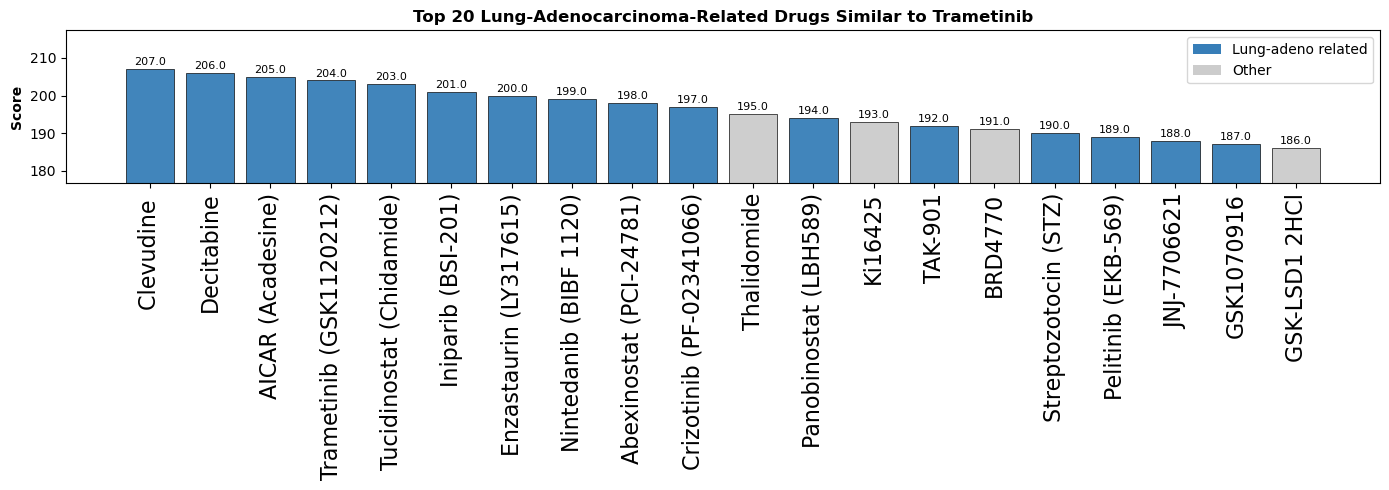

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import re



mask = df['drug'].str.lower().apply(lambda x: x.split('(')[0].strip()) \
        .isin(drop_list) == False
top20 = df[mask].drop_duplicates(subset='drug').head(20).reset_index(drop=True)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

df = pd.read_csv('Trametinib_screen.csv')

drop_list = {
  
}

mask = df['drug'].str.lower().isin(drop_list) == False
top20 = df[mask].drop_duplicates(subset='drug').head(20).reset_index(drop=True)

lung_adeno_drugs = {

}

def is_lung_related(name):
    name_clean = name.lower().strip()
    return any(k in name_clean for k in lung_adeno_drugs)

drug_names = top20['drug'].values
scores = top20['score'].values
colors = ['#377EB8' if is_lung_related(d) else '#cccccc' for d in drug_names]

plt.figure(figsize=(14, 5))
bars = plt.bar(range(len(drug_names)), scores, color=colors, alpha=0.95,
               edgecolor='black', linewidth=0.5)

for bar, value in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}', ha='center', va='bottom', fontsize=8)

plt.xticks(range(len(drug_names)), drug_names, rotation=90, ha='center', fontsize=16)
plt.ylabel('Score', fontweight='bold')
plt.title('Top 20 Lung-Adenocarcinoma-Related Drugs Similar to Trametinib', fontweight='bold')
plt.ylim(scores.min() * 0.95, scores.max() * 1.05)

plt.legend(handles=[
    Patch(facecolor='#377EB8', label='Lung-adeno related'),
    Patch(facecolor='#cccccc', label='Other')
], loc='upper right')

plt.tight_layout()
# plt.savefig('./figure/Trametinib_lung_sciplex188_top20_fixed.svg', format='svg', dpi=300,
#             bbox_inches='tight', pad_inches=0.1)
plt.show()